In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LMz6XaxP7FaH5uUuJbRyeEuQ2XGadC84Cu
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Input,Normalization
from eval_class import *
from keras.callbacks import EarlyStopping
from keras import regularizers

In [40]:
rasad = pd.read_csv(r'C:\Users\Sharif\Downloads\Compressed\data_mining_test_Project\Data.csv')

In [41]:
L=[12500]
for i in range(1,len(rasad)):
    L.append(rasad.iloc[i-1]['Close'])
rasad['Close-1']=L


In [42]:
rasad=rasad.drop(['Unnamed: 0'],axis=1)
rasad=rasad.drop(['signal'],axis=1)

In [43]:
train=rasad[:1907]
validation=rasad[1907:]

In [44]:
train['Close'] = pd.to_numeric(train.Close, errors = 'coerce')
a=train[['Close']]
a = a.dropna()

C:\Users\Sharif\AppData\Local\Temp\ipykernel_11984\3528482586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'] = pd.to_numeric(train.Close, errors = 'coerce')


In [45]:
sc = MinMaxScaler(feature_range = (0, 1))
train_Close= sc.fit_transform(a)
train_Close.shape

(1907, 1)

In [46]:
X_train = []
Y_train = []

for i in range(15, 1907):   #60 : timestep //1981 : length of the data
    X_train.append(train_Close[i-15:i, 0])
    Y_train.append(train_Close[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [47]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #adding the batch_size axis
X_train.shape

(1892, 15, 1)

In [48]:
validData = validation[['Close']]
validData['Close'] = pd.to_numeric(validData.Close, errors = 'coerce')
validData = validData.dropna()
Y_valid =validData.iloc[15:, 0:].values
#input array for the model
inputClosingvalid = validData.iloc[:, 0:].values
inputClosingvalid_scaled = sc.transform(inputClosingvalid)
inputClosingvalid_scaled.shape
X_valid = []
length = len(validData)
timestep = 15
for i in range(timestep, length):
    X_valid.append(inputClosingvalid_scaled[i-timestep:i, 0])
X_valid = np.array(X_valid)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
X_valid.shape

C:\Users\Sharif\AppData\Local\Temp\ipykernel_11984\2717689737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validData['Close'] = pd.to_numeric(validData.Close, errors = 'coerce')
C:\Users\Sharif\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(719, 15, 1)

In [61]:
model = Sequential()

model.add(Normalization())
model.add(LSTM(units = 128, return_sequences = True , input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 128, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [62]:
hist = model.fit(X_train, Y_train, batch_size = 32, verbose = 2, validation_data=(X_valid , Y_valid), epochs=20)

Epoch 1/20
60/60 - 12s - loss: 0.0048 - val_loss: 34056491008.0000 - 12s/epoch - 193ms/step
Epoch 2/20
60/60 - 3s - loss: 7.9490e-04 - val_loss: 34056478720.0000 - 3s/epoch - 47ms/step
Epoch 3/20
60/60 - 3s - loss: 7.1746e-04 - val_loss: 34056499200.0000 - 3s/epoch - 46ms/step
Epoch 4/20
60/60 - 3s - loss: 6.5656e-04 - val_loss: 34056474624.0000 - 3s/epoch - 47ms/step
Epoch 5/20
60/60 - 3s - loss: 7.0745e-04 - val_loss: 34056515584.0000 - 3s/epoch - 51ms/step
Epoch 6/20
60/60 - 4s - loss: 6.1103e-04 - val_loss: 34056484864.0000 - 4s/epoch - 60ms/step
Epoch 7/20
60/60 - 3s - loss: 7.5429e-04 - val_loss: 34056460288.0000 - 3s/epoch - 49ms/step
Epoch 8/20
60/60 - 3s - loss: 5.8367e-04 - val_loss: 34056454144.0000 - 3s/epoch - 44ms/step
Epoch 9/20
60/60 - 3s - loss: 6.2372e-04 - val_loss: 34056497152.0000 - 3s/epoch - 45ms/step
Epoch 10/20
60/60 - 3s - loss: 5.6067e-04 - val_loss: 34056474624.0000 - 3s/epoch - 47ms/step
Epoch 11/20
60/60 - 3s - loss: 5.2447e-04 - val_loss: 34056474624.0000

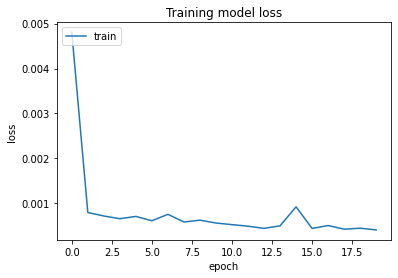

In [63]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc = 'upper left')
plt.show()

60/60 [==============================] - 3s 19ms/step


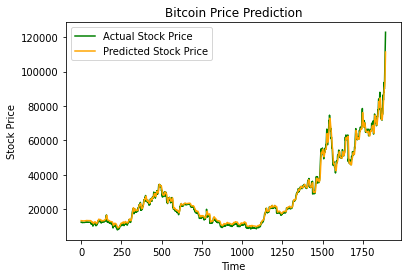

In [54]:
Y_pred_train = model.predict(X_train)
Y_pred_train=np.reshape(Y_pred_train, (Y_pred_train.shape[0], Y_pred_train.shape[1]))

predict_price_train = sc.inverse_transform(Y_pred_train)
a=train.iloc[15:][['Close']]
a=a.Close.tolist()
plt.plot(a, color = 'green', label = 'Actual Stock Price')
plt.plot(predict_price_train, color = 'orange', label = 'Predicted Stock Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

60/60 [==============================] - 1s 17ms/step


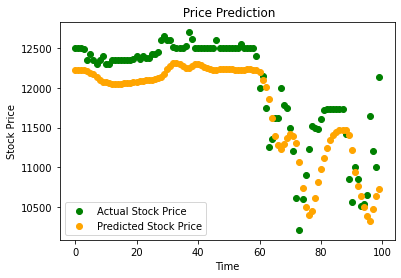

In [65]:
Y_pred_train = model.predict(X_train)
Y_pred_train=np.reshape(Y_pred_train, (Y_pred_train.shape[0], Y_pred_train.shape[1]))

predict_price_train = sc.inverse_transform(Y_pred_train)
a=train.iloc[15:][['Close']]
a=a.Close.tolist()
plt.scatter(np.arange(0,100,1),a[:100], color = 'green', label = 'Actual Stock Price')
plt.scatter(np.arange(0,100,1),predict_price_train[:100], color = 'orange', label = 'Predicted Stock Price')
plt.title(' Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

23/23 [==============================] - 0s 6ms/step


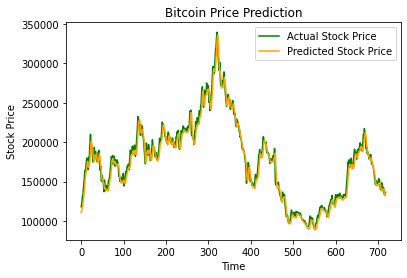

In [16]:
Y_pred_valid = model.predict(X_valid)
predict_price_valid = sc.inverse_transform(Y_pred_valid)
plt.plot(Y_valid, color = 'green', label = 'Actual Stock Price')
plt.plot(predict_price_valid, color = 'orange', label = 'Predicted Stock Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
p_price_valid=[]
for i in range(len(predict_price_valid)):
    p_price_valid.append(predict_price_valid[i][0])
    
datas={
    "Close_pred":p_price_valid,
    "close":validation[15:].Close.tolist() ,
    "Date":validation[15:].Date.tolist()
}
Predict_price_valid=pd.DataFrame(datas)


Predict_price_valid.to_csv('Predict_price_valid.csv', sep=',', index=False, encoding='utf-8')


In [29]:
p_price_train=[]
for i in range(len(predict_price_train)):
    p_price_train.append(predict_price_train[i][0])

datas={
    "Close_pred":p_price_train,
    "close":train[15:].Close.tolist(),
    "Date":train[15:].Date.tolist()
}
Predict_price_train=pd.DataFrame(datas)


Predict_price_train.to_csv('Predict_price_train.csv', sep=',', index=False, encoding='utf-8')

In [3]:
Predict_price_train = pd.read_csv(r'Predict_price_train.csv')
Predict_price_valid = pd.read_csv(r'Predict_price_valid.csv')

In [4]:
Predict_price_train

,Close_pred,close,Date
0,12114.414,12500,20110806
1,12113.396,12500,20110807
2,12113.257,12500,20110808
3,12113.564,12490,20110809
4,12111.791,12350,20110810
...,...,...,...
1887,91606.945,103391,20200427
1888,95065.970,107117,20200428
1889,99141.080,111480,20200429
1890,103581.060,117054,20200502


In [22]:
Predict_price_valid

,Close_pred,close
0,110688.030,118000
1,112334.960,120341
2,114490.580,124995
3,117657.790,131244
4,122202.016,129900
...,...,...
714,139181.560,140000
715,138373.300,133650
716,135573.620,133400
717,132931.530,136450


In [17]:
rasad= rasad.merge(Predict_price_valid, left_on='Close', right_on='close')

In [18]:
rasad

,Date_x,Open,High,Low,Close,v_i_buy,v_n_buy,v_i_sell,v_n_sell,n_i_buy,...,n_n_sell,f1,f2,f3,f4,f5,f6,Close_pred,close,Date_y
0,20200601,114100,119999,112002,118000,1239676.0,166721.0,697937.0,708460.0,775.0,...,6.0,0.184714,0.269600,1.000000,1.178220,0.000000,-0.053678,110688.030,118000,20200601
1,20200601,114100,119999,112002,118000,1239676.0,166721.0,697937.0,708460.0,775.0,...,6.0,0.184714,0.269600,1.000000,1.178220,0.000000,-0.053678,112281.336,118000,20221116
2,20221116,117050,118550,113400,118000,230215.0,319039.0,535254.0,14000.0,223.0,...,3.0,0.747331,0.841983,0.064013,0.644810,-0.666282,8.515931,110688.030,118000,20200601
3,20221116,117050,118550,113400,118000,230215.0,319039.0,535254.0,14000.0,223.0,...,3.0,0.747331,0.841983,0.064013,0.644810,-0.666282,8.515931,112281.336,118000,20221116
4,20200602,118888,120341,115066,120341,1665109.0,109020.0,1218352.0,555777.0,723.0,...,5.0,0.142586,0.232979,0.954934,1.205150,-0.045066,3.349921,112334.960,120341,20200602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,20230708,141550,144300,140000,140700,452336.0,25042.0,358911.0,118467.0,464.0,...,3.0,0.141847,0.289261,0.994867,0.889799,0.532186,-2.654331,140375.470,140700,20230708
839,20230709,143000,143800,141000,142600,476754.0,2000.0,422394.0,56360.0,431.0,...,3.0,0.095552,0.224729,0.778586,0.922435,0.270728,-4.050348,139420.550,142600,20230709
840,20230711,139000,139000,133300,133650,377747.0,20807.0,398354.0,200.0,347.0,...,1.0,0.182436,0.291115,1.000000,1.027145,0.005133,-3.953175,138373.300,133650,20230711
841,20230715,133800,138900,133650,136450,507663.0,21897.0,344784.0,184776.0,449.0,...,3.0,0.343409,0.508836,0.992386,1.058249,-0.007614,-7.833776,132931.530,136450,20230715


In [10]:
validation.Close[:20].tolist()

[126922,
 129800,
 122178,
 117472,
 111846,
 107331,
 113020,
 117680,
 119999,
 118002,
 112000,
 106101,
 112222,
 117425,
 114200,
 118000,
 120341,
 124995,
 131244,
 129900]

In [14]:
Predict_price_valid.Close_pred[:20].tolist()

[110688.03,
 112334.96,
 114490.58,
 117657.79,
 122202.016,
 125414.25,
 130248.125,
 135998.8,
 142651.67,
 148899.45,
 155482.1,
 159509.22,
 163446.36,
 167532.81,
 172108.12,
 175588.02,
 174118.2,
 169516.16,
 168074.56,
 170945.55]

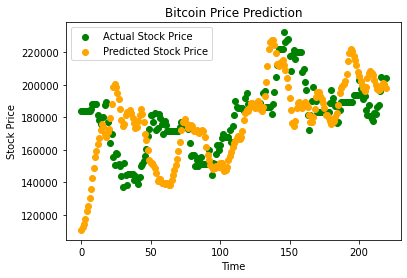

In [38]:

plt.scatter(rasad.index[:220],rasad.Close[40:260], color = 'green', label = 'Actual Stock Price')
plt.scatter(rasad.index[:220],Predict_price_valid.Close_pred[:220], color = 'orange', label = 'Predicted Stock Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()